# Лабораторная работа №2

## Задание: 

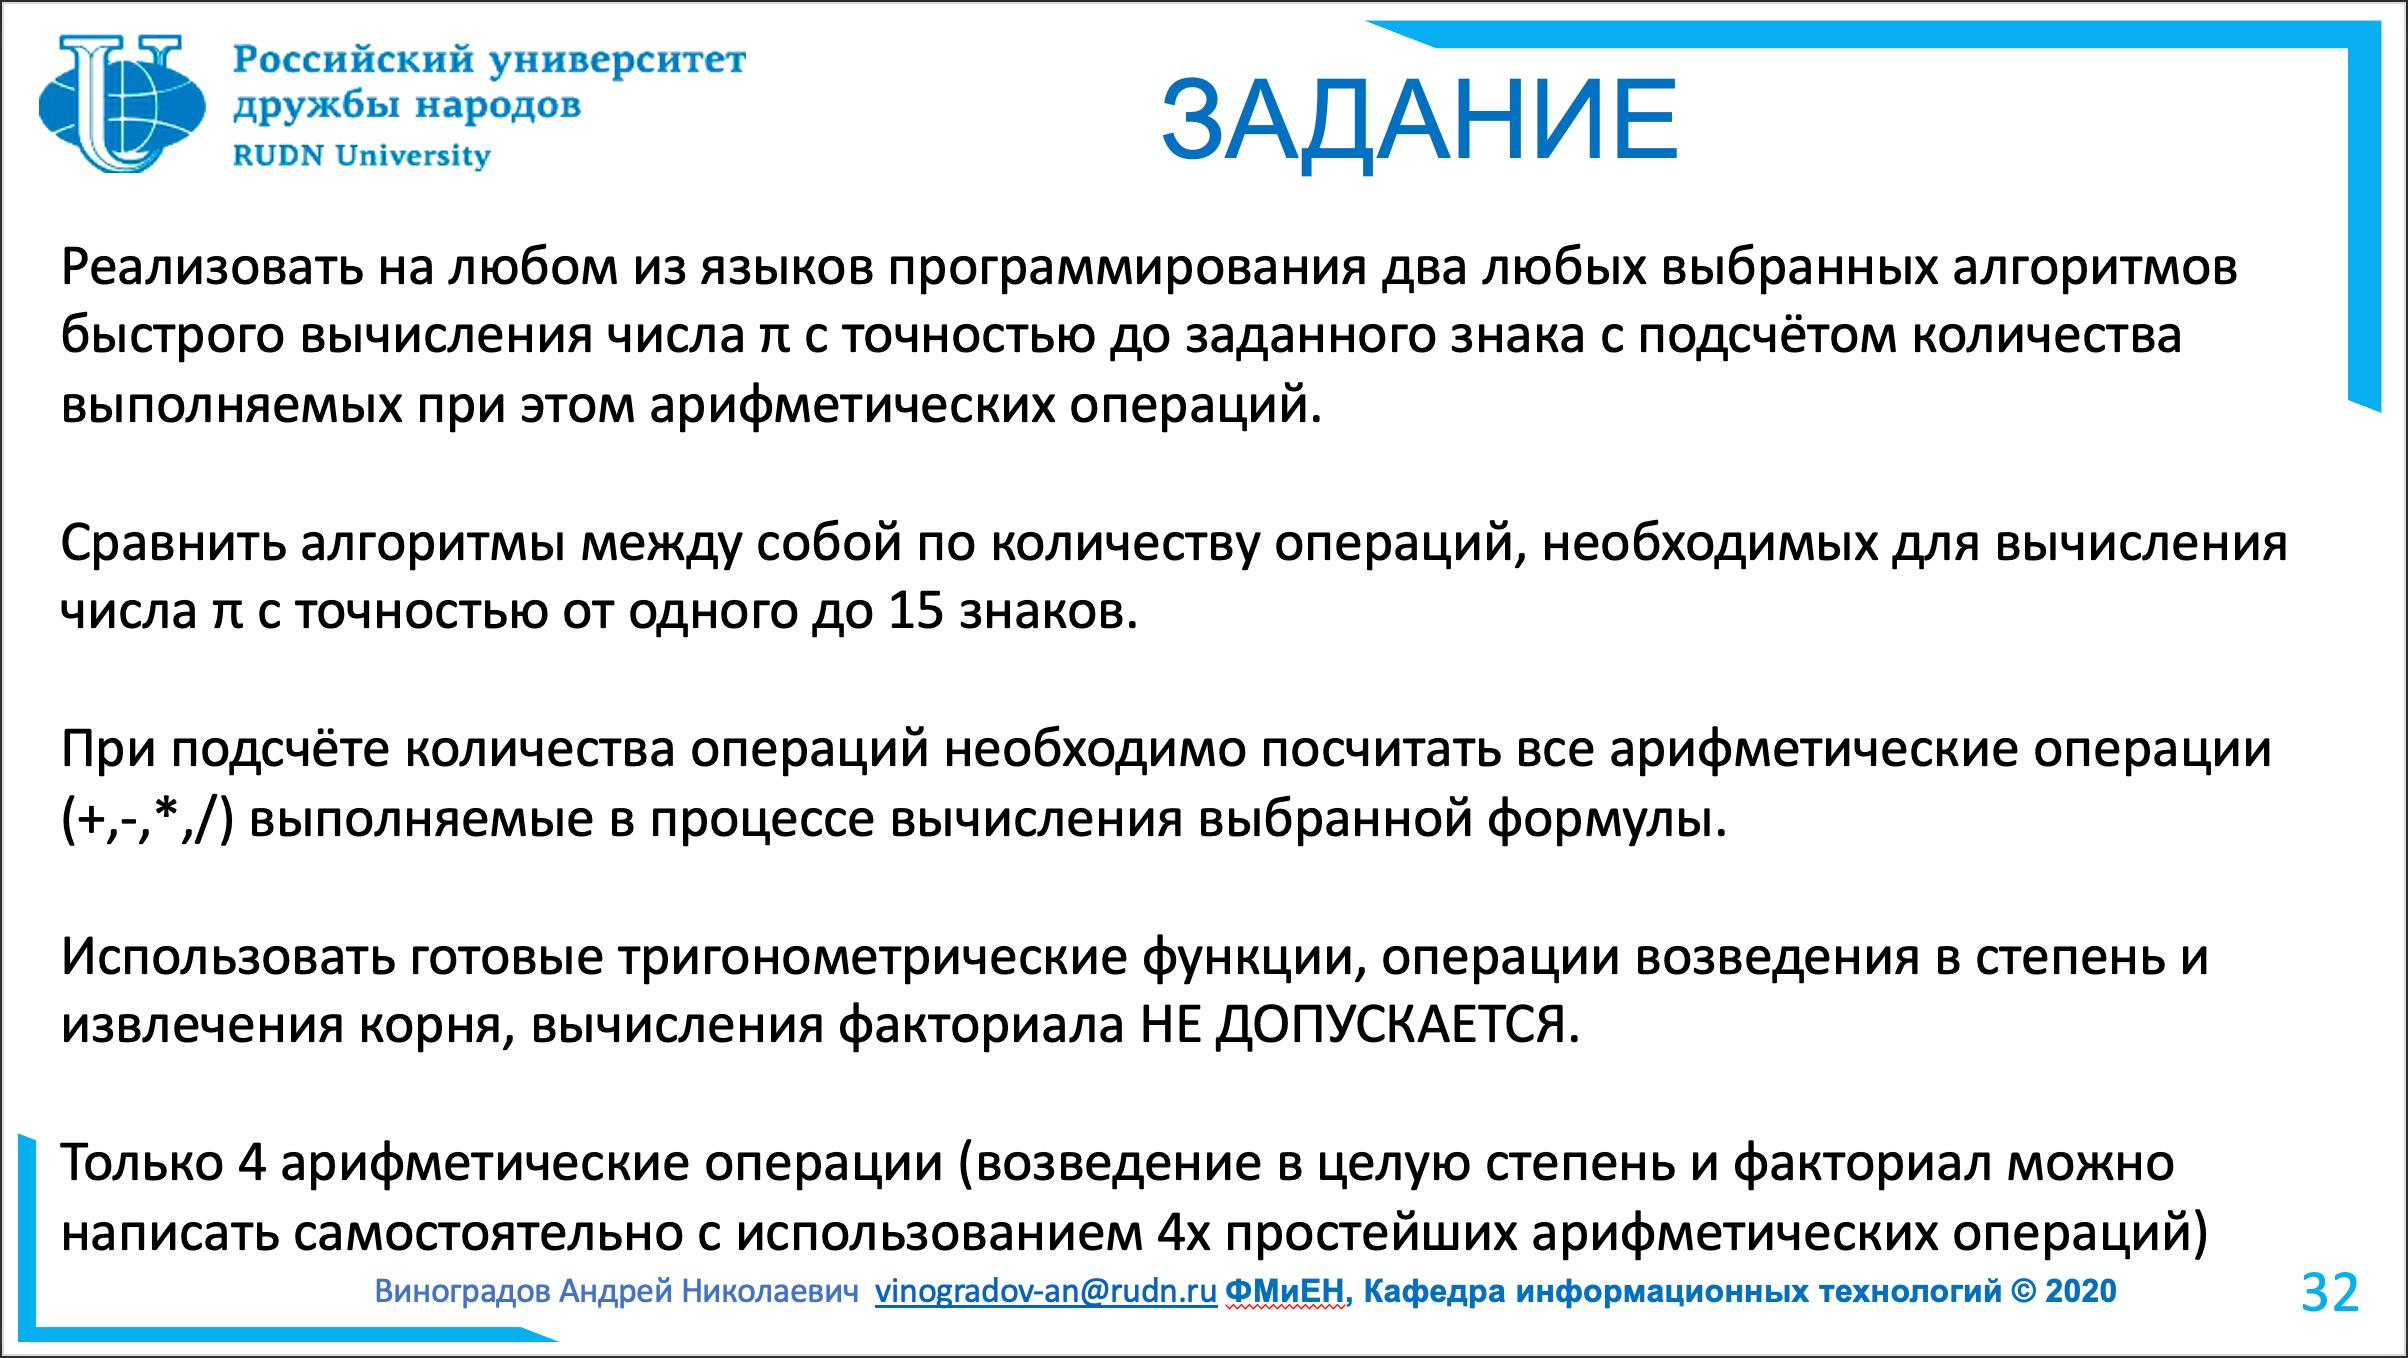

## Выполнение: 

### 1. Подготовка:

In [73]:
!pwd

/Users/artyem.petrov/dev/university/4-1/it-computer-practice/lab02


In [86]:
!../.venv/bin/pip install pandas

  Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl (10.7 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]━━━━ 1/2 [pandas]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Users/artyem.petrov/dev/university/4-1/it-computer-practice/.venv/bin/python -m pip install --upgrade pip


In [87]:
import math
from typing import Callable 
import time
import pandas as pd

### 2. Реализуем класс для подсчета кол-ва операций:

In [88]:
class Counter:
    def __init__(self):
        self.ops = 0
        
    def add(self, count: int=1):
        self.ops += count
        return self.ops

### 3. Реализуем ряд Лейбница:

In [89]:
def pi_leibniz(n_terms: int, counter: Counter):
    pi = 0.0
    for k in range(n_terms):
        term = 4 / (2*k + 1)
        if k % 2 == 0:
            pi += term
        else:
            pi -= term
        counter.add(3)
    return pi

### 4. Реализуем ряд Нилаканты:

In [90]:
def pi_nilakantha(n_terms: int, counter: Counter):
    pi = 3.0
    sign = 1
    for k in range(n_terms):
        a = 2*k + 2
        b = 2*k + 3
        c = 2*k + 4
        term = 4 / (a * b * c)
        pi += sign * term
        sign *= -1
        counter.add(7)
    return pi

### 5. Создадим функцию для определения необходимого кол-ва итераций для заданной точности:

In [91]:
def iterations_for_precision(algorithm: Callable[int, Counter], precision: int):
    target_error = 10 ** (-precision)
    prev_pi = 0
    for n in range(1, 10**6):
        counter = Counter()
        pi = algorithm(n, counter)
        if abs(pi - prev_pi) < target_error:
            return n, counter.ops
        prev_pi = pi
    return None

### 6. Запуск:

In [106]:
data = []

for prec in range(1, 16):
    print(f"Вычисляем точность до {prec} знака")
    start_time = time.perf_counter()
    n_leib, ops_leib = iterations_for_precision(pi_leibniz, prec)
    time_leib = time.perf_counter() - start_time

    start_time = time.perf_counter()
    n_nil, ops_nil = iterations_for_precision(pi_nilakantha, prec)
    time_nil = time.perf_counter() - start_time
    
    data.append(
        {
            'Точность (цифр)': prec,
            'Итерации Лейбниц': n_leib,
            'Операции Лейбниц': ops_leib,
            'Время Лейбниц (сек)': f"{time_leib:.6f}",
            'Итерации Нилаканта': n_nil,
            'Операции Нилаканта': ops_nil,
            'Время Нилаканта (сек)': f"{time_nil:.6f}",
        }
    )

Вычисляем точность до 1 знака
Вычисляем точность до 2 знака
Вычисляем точность до 3 знака
Вычисляем точность до 4 знака
Вычисляем точность до 5 знака


KeyboardInterrupt: 

In [108]:
df = pd.DataFrame(data)

df.head(5)

,Точность (цифр),Итерации Лейбниц,Операции Лейбниц,Время Лейбниц (сек),Итерации Нилаканта,Операции Нилаканта,Время Нилаканта (сек)
0,1,21,63,0.000058,2,14,0.000004
1,2,201,603,0.004844,4,28,0.000013
2,3,2001,6003,0.178910,8,56,0.000010
3,4,20001,60003,16.191705,17,119,0.000023


### Промежуточный вывод:

Моя реализация формулы Лейбница для точности > 4 знаков после запятой занимает очень много времени (10 минут для пятой итерации), поэтому реализуем другую функцию

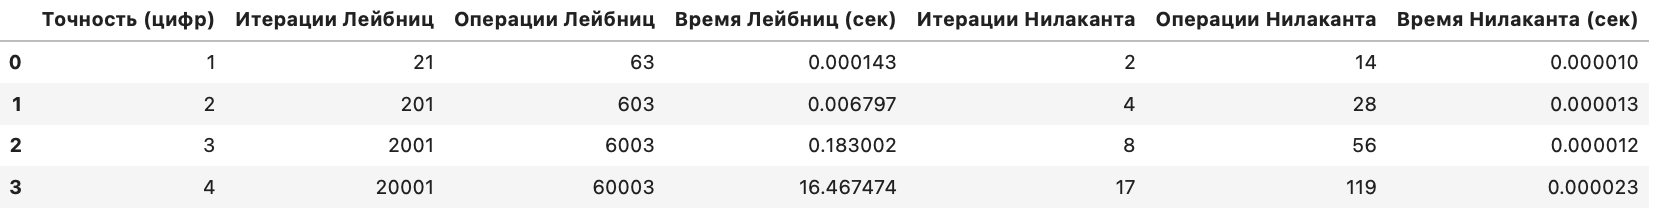

### 7. Реализуем формулу Мэчина:

#### 7.1. Реализуем функцию для возведения в степень:

In [109]:
def power(x: float, n: int, counter: Counter) -> float:
    result = 1.0
    for _ in range(n):
        result *= x
        counter.add(1)
    return result

#### 7.2. Реализуем функцю для вычисления арктангенса через ряд Тейлора: 

In [110]:
def arctan_taylor(x: float, n_terms: int, counter: Counter):
    result = 0.0
    sign = 1
    for k in range(n_terms):
        exponent = 2*k + 1
        term = power(x, exponent, counter) / exponent
        result += sign * term
        sign *= -1
        counter.add(2)
    return result

#### 7.3. Реализуем формулу Мэчина:

In [111]:
def pi_machin(n_terms: int, counter: Counter):
    # Вычисляем arctan(1/5)
    counter_atan1 = Counter()
    atan1 = arctan_taylor(1/5, n_terms, counter_atan1)
    
    # Вычисляем arctan(1/239)
    counter_atan2 = Counter()
    atan2 = arctan_taylor(1/239, n_terms, counter_atan2)
    
    pi = 4 * (4 * atan1 - atan2)
    
    # Суммируем операции
    counter.ops = counter_atan1.ops + counter_atan2.ops + 3  # 3 операции: 2 умножения и 1 вычитание
    
    return pi

### 8. Повторное выполнение 

In [112]:
data = []
for prec in range(1, 16):
    print(f"Вычисляем точность до {prec} знака")
    
    start_time = time.perf_counter()
    n_mac, ops_mac = iterations_for_precision(pi_machin, prec)
    time_mac = time.perf_counter() - start_time

    start_time = time.perf_counter()
    n_nil, ops_nil = iterations_for_precision(pi_nilakantha, prec)
    time_nil = time.perf_counter() - start_time
    
    data.append(
        {
            'Точность (цифр)': prec,
            'Итерации Мэчина': n_mac,
            'Операции Мэчина': ops_mac,
            'Время Мэчина (сек)': f"{time_mac:.6f}",
            'Итерации Нилаканта': n_nil,
            'Операции Нилаканта': ops_nil,
            'Время Нилаканта (сек)': f"{time_nil:.6f}",
        }
    )

Вычисляем точность до 1 знака
Вычисляем точность до 2 знака
Вычисляем точность до 3 знака
Вычисляем точность до 4 знака
Вычисляем точность до 5 знака
Вычисляем точность до 6 знака
Вычисляем точность до 7 знака
Вычисляем точность до 8 знака
Вычисляем точность до 9 знака
Вычисляем точность до 10 знака
Вычисляем точность до 11 знака
Вычисляем точность до 12 знака
Вычисляем точность до 13 знака
Вычисляем точность до 14 знака
Вычисляем точность до 15 знака


In [114]:
df = pd.DataFrame(data)

df.head(20)

,Точность (цифр),Итерации Мэчина,Операции Мэчина,Время Мэчина (сек),Итерации Нилаканта,Операции Нилаканта,Время Нилаканта (сек)
0,1,2,19,0.000022,2,14,0.000004
1,2,3,33,0.000011,4,28,0.000005
2,3,4,51,0.000016,8,56,0.000013
3,4,4,51,0.000016,17,119,0.000045
4,5,5,73,0.000023,37,259,0.000189
5,6,5,73,0.000023,79,553,0.000851
6,7,6,99,0.000036,171,1197,0.004266
7,8,7,129,0.000056,368,2576,0.020034
8,9,8,163,0.000028,794,5558,0.038404
9,10,8,163,0.000033,1710,11970,0.175348


### 9. Результат: 

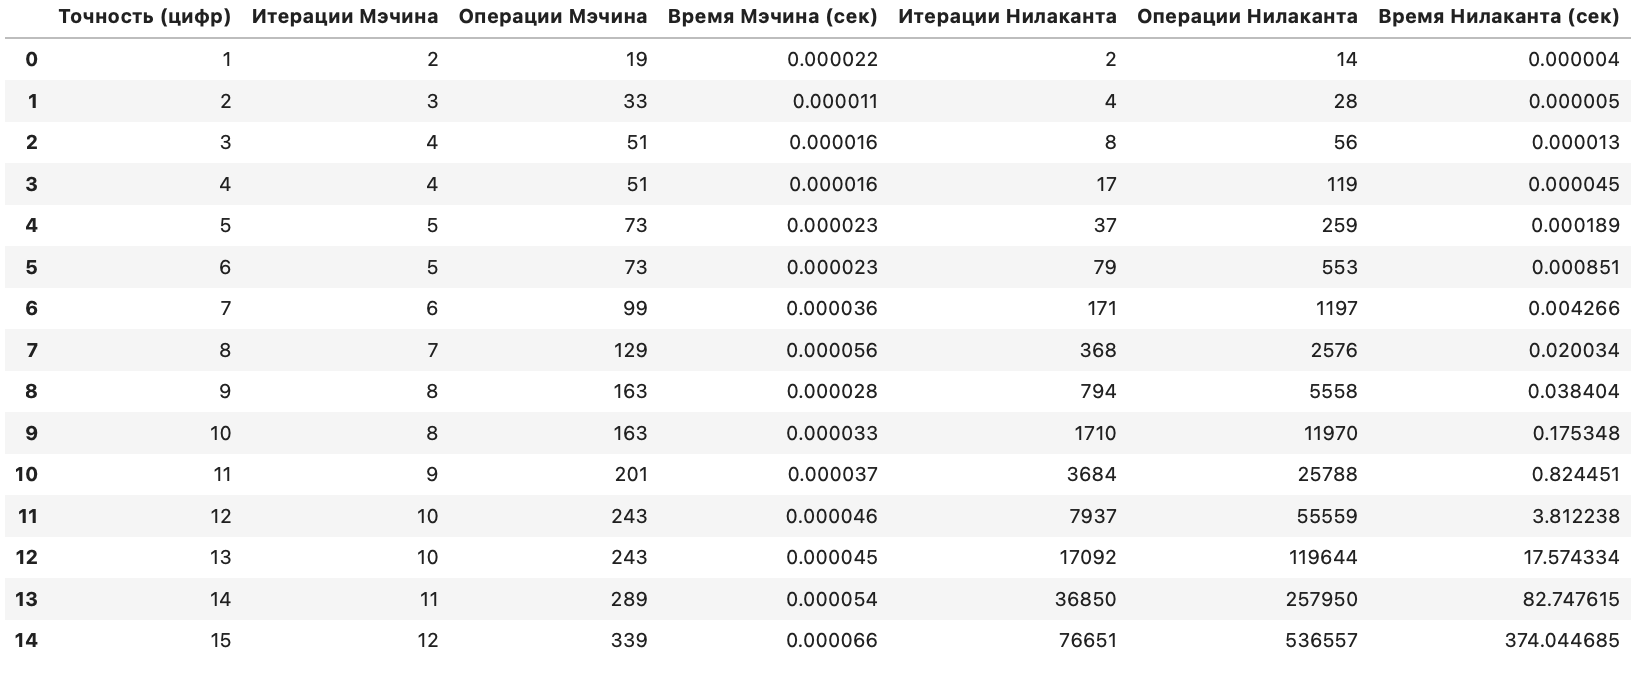

## Вывод: 

С помощью данной лабораторной работы мы научились применять формулы для вычисления чилса Pi до определенного знака итеративными методами